### Importaciones

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# cargamos la data
df = pd.read_csv('data/Encuesta_Motociclistas_20241016.csv')

print(df.columns)

Index(['uuid', 'municipio', 'estrato_vivienda', 'hombre', 'sin_grupo_etnico',
       'etnia_afrocolombiano', 'edad_grupo', 'nivel_educativo', 'moto_street',
       'moto_scooter', 'moto_deportiva', 'cilin_grupo', 'modelo_grupo',
       'frenos_disco', 'frenos_mixto', 'frenos_tambor', 'tec_frenado',
       'dias_semana', 'sector_comercio', 'sector_servicios',
       'sector_transporte', 'herramienta_trabajo', 'transporte_cotidiano',
       'trabajo_domicilios', 'trabajo_transporte_pasajeros',
       'frecuencia_revisionpre', 'costo_casco', 'costo_mantenimiento',
       'gasto_anual', 'licencia_moto', 'licencia_curso', 'experiencia',
       'riesgo_velocidad', 'riesgo_sinlucesdia', 'riesgo_sinlucesnoche',
       'riesgo_sinreflectivos', 'motivo_dinero', 'motivo_tiempo',
       'motivo_independencia', 'epp_casco', 'epp_guantes', 'epp_botas',
       'epp_rodilleras', 'epp_reflectivos', 'epp_chaquetaprot',
       'epp_chaquetairbag', 'con_acompañantes', 'con_acompañantes_menores',
       'p

# ¿Cuál es la relación entre el nivel educativo y el tipo de motocicleta más utilizado por los encuestados?

>## 1. SELECCIONAMOS LAS COLUMNAS RELEVANTES

>* nivel_educativo -> **Nivel educativo de las personas**
>* moto_street, moto_scooter, moto_deportiva -> **Tipos de motocicletas**

In [4]:
# seleccionamos las columnas
filtrar_columnas = df[['nivel_educativo', 'moto_street', 'moto_scooter', 'moto_deportiva']]
# Se Revisan los valores unicos y se limpian los datos si es necesario
print("Niveles educativos únicos:", df['nivel_educativo'].unique())


Niveles educativos únicos: ['Secundaria' 'Técnica / Tecnológica' 'Universitaria o postgrado'
 'Primaria o menos' nan]


In [5]:
# Creamos un DataFrame agrupado
# Sumamos los tipos de motos por nivel educativo
suma_motos_nivel_educativo = filtrar_columnas.groupby('nivel_educativo').sum()
print(suma_motos_nivel_educativo)

                           moto_street  moto_scooter  moto_deportiva
nivel_educativo                                                     
Primaria o menos                  1161           276             464
Secundaria                        5492          1677            2282
Técnica / Tecnológica             2895          1442            1344
Universitaria o postgrado         1557           945             669


In [6]:
# Obtenemos el porcentaje
porcentaje_agrupado = suma_motos_nivel_educativo.div(suma_motos_nivel_educativo.sum(axis=1), axis=0) * 100
print(porcentaje_agrupado)

                           moto_street  moto_scooter  moto_deportiva
nivel_educativo                                                     
Primaria o menos             61.073119     14.518674       24.408206
Secundaria                   58.110253     17.744154       24.145593
Técnica / Tecnológica        50.959338     25.382855       23.657807
Universitaria o postgrado    49.101230     29.801325       21.097446


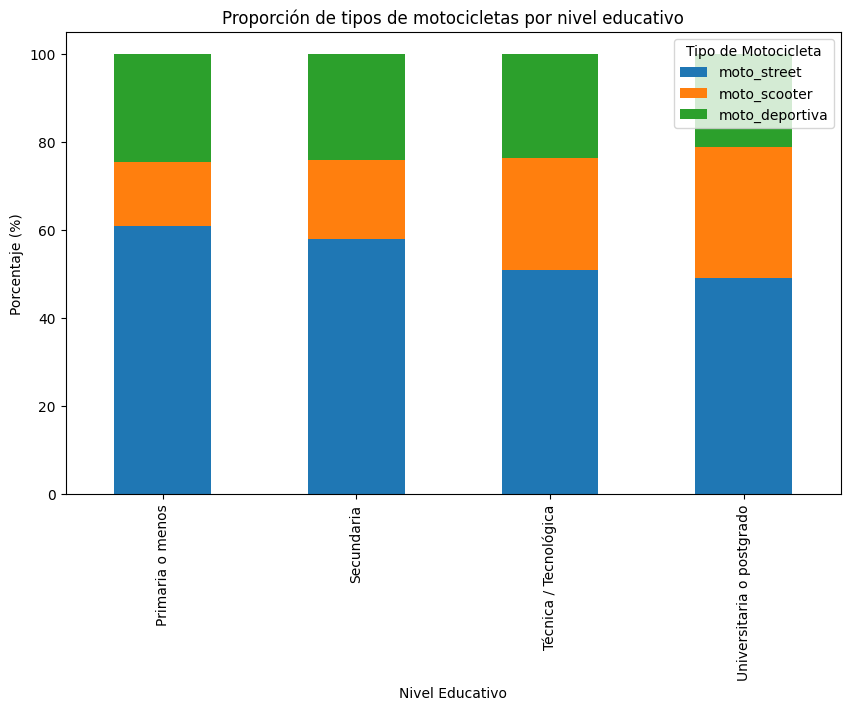

In [7]:
# Graficamos el resultados
porcentaje_agrupado.plot(kind='bar', stacked=True, figsize=(10, 6))
# titulo de la grafica
plt.title("Proporción de tipos de motocicletas por nivel educativo")
# titulo para el nivel educativo
plt.xlabel("Nivel Educativo")
# titulo para el porcentaje
plt.ylabel("Porcentaje (%)")
# titulo para el recuadro que muestra el tipo de motos
plt.legend(title="Tipo de Motocicleta")
plt.show()